In [32]:
from Module.data_processing import load_data, clean_data, preprocess_data
from Module.model_evaluation import *
from Module.neural_network import build_cnn_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import numpy as np

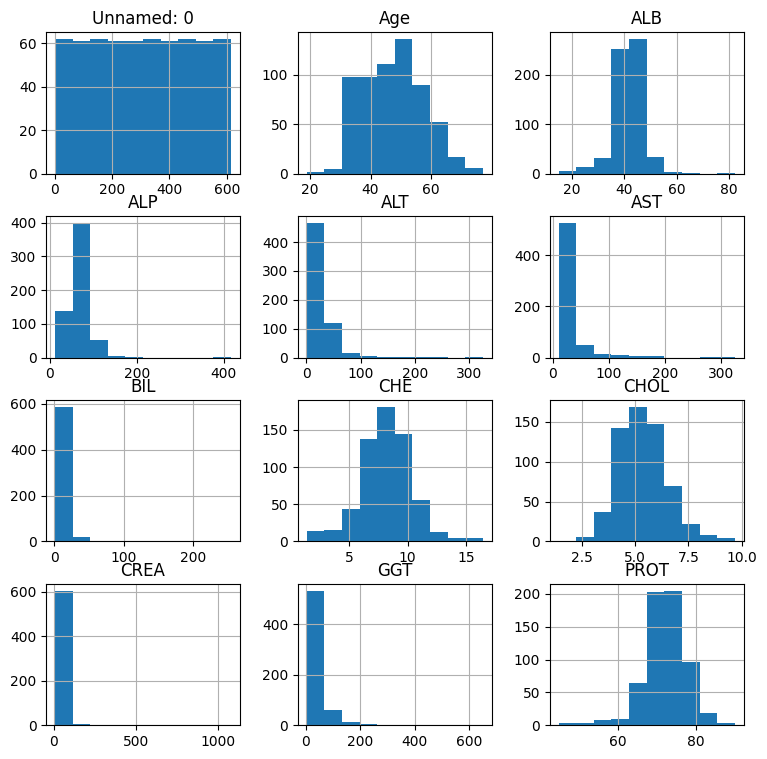

In [33]:
file_path = "hcvdat0.csv"
data = load_data(file_path)

data.hist(figsize=(9, 9))
plt.show()

In [34]:
cleaned_data = clean_data(data)
X = cleaned_data.drop('Category', axis=1)
y = cleaned_data['Category']
random_state_value =42
X_train_before, X_test_before, y_train_before, y_test_before = train_test_split(X, y, test_size=0.2, random_state=random_state_value)


KNN Classifier (Before Preprocessing):
Accuracy: 0.8983050847457628
Precision: 0.8398146681450973
Recall: 0.8983050847457628
F1 Score: 0.8671539913106475

Classification Report:
                        precision    recall  f1-score   support

         0=Blood Donor       0.93      1.00      0.96        99
0s=suspect Blood Donor       1.00      0.00      0.00         2
           1=Hepatitis       0.00      0.00      1.00         8
            2=Fibrosis       0.50      0.67      0.57         3
           3=Cirrhosis       1.00      0.83      0.91         6

              accuracy                           0.90       118
             macro avg       0.69      0.50      0.69       118
          weighted avg       0.86      0.90      0.93       118



C:\Users\pande\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


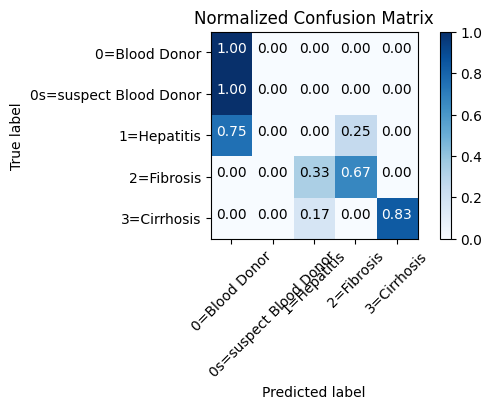

In [35]:
print("\nKNN Classifier (Before Preprocessing):")
knn_classifier_before = KNeighborsClassifier(n_neighbors=5)
knn_accuracy_before, knn_precision_before, knn_recall_before, knn_f1_before = train_and_evaluate_ml_before(
    knn_classifier_before, X_train_before, X_test_before, y_train_before, y_test_before)


Random Forest Classifier (Before Preprocessing):
Accuracy: 0.8898305084745762
Precision: 0.864646626159258
Recall: 0.8898305084745762
F1 Score: 0.8727711175416839

Classification Report:
                        precision    recall  f1-score   support

         0=Blood Donor       0.92      0.99      0.96        99
0s=suspect Blood Donor       0.50      0.50      0.50         2
           1=Hepatitis       0.25      0.12      0.17         8
            2=Fibrosis       0.50      0.33      0.40         3
           3=Cirrhosis       1.00      0.67      0.80         6

              accuracy                           0.89       118
             macro avg       0.63      0.52      0.56       118
          weighted avg       0.86      0.89      0.87       118



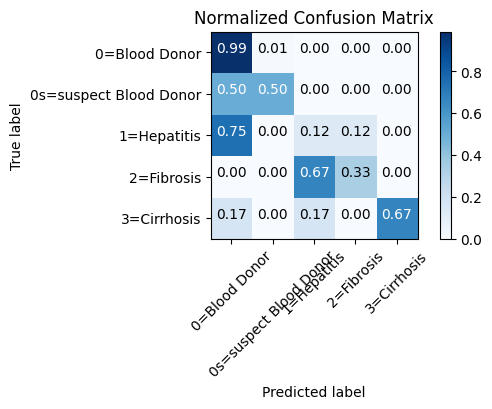

In [36]:
print("\nRandom Forest Classifier (Before Preprocessing):")
rf_classifier_before = RandomForestClassifier(random_state=42)
rf_accuracy_before, rf_precision_before, rf_recall_before, rf_f1_before = train_and_evaluate_ml_before(
    rf_classifier_before, X_train_before, X_test_before, y_train_before, y_test_before)


SVM Classifier (Before Preprocessing):
Accuracy: 0.8813559322033898
Precision: 0.8315957787016308
Recall: 0.8813559322033898
F1 Score: 0.8549527776894457

Classification Report:
                        precision    recall  f1-score   support

         0=Blood Donor       0.92      0.99      0.96        99
0s=suspect Blood Donor       0.00      0.00      1.00         2
           1=Hepatitis       0.20      0.12      0.15         8
            2=Fibrosis       1.00      0.00      0.00         3
           3=Cirrhosis       0.83      0.83      0.83         6

              accuracy                           0.88       118
             macro avg       0.59      0.39      0.59       118
          weighted avg       0.86      0.88      0.87       118



C:\Users\pande\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


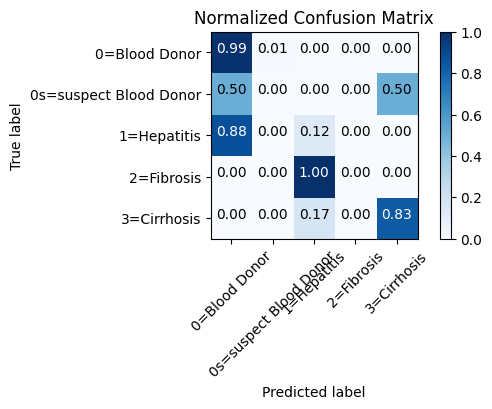

In [37]:
print("\nSVM Classifier (Before Preprocessing):")
svm_classifier_before = SVC(random_state=42)
svm_accuracy_before, svm_precision_before, svm_recall_before, svm_f1_before = train_and_evaluate_ml_before(
    svm_classifier_before, X_train_before, X_test_before, y_train_before, y_test_before)


Neural Network (Before Preprocessing):
4/4 [==============================] - 0s 2ms/step
Neural Network Accuracy: 0.9322033898305084
Neural Network Precision: 0.9737288135593221
Neural Network Recall: 0.9322033898305084
Neural Network F1 Score: 0.925105026799942

Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       101
           1       1.00      0.12      0.22         8
           2       0.30      1.00      0.46         3
           3       1.00      1.00      1.00         6

    accuracy                           0.93       118
   macro avg       0.82      0.78      0.67       118
weighted avg       0.97      0.93      0.93       118



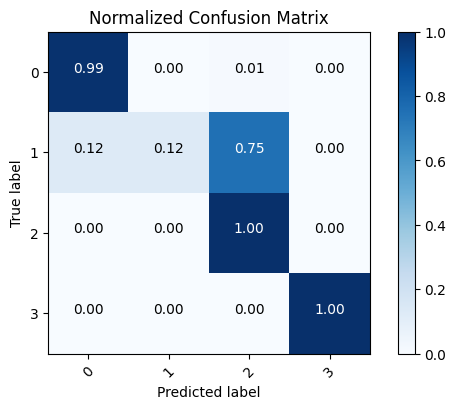

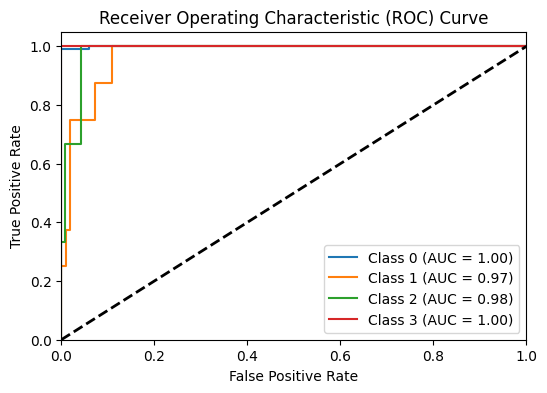

In [38]:
print("\nNeural Network (Before Preprocessing):")
X_train_resampled, X_test_imputed, y_train_resampled, y_test = preprocess_data(X, y)
num_classes = len(np.unique(y_train_resampled))
input_shape = (X_train_resampled.shape[1], 1)
X_train_reshaped = X_train_resampled.values.reshape(X_train_resampled.shape[0], X_train_resampled.shape[1], 1)
X_test_reshaped = X_test_imputed.values.reshape(X_test_imputed.shape[0], X_test_imputed.shape[1], 1)
model = build_cnn_model(input_shape, num_classes)
nn_accuracy_before, nn_precision_before, nn_recall_before, nn_f1_before, nn_roc_auc_before = train_and_evaluate_nn(model, X_train_reshaped, y_train_resampled, X_test_reshaped, y_test, epochs=20, batch_size=32)


CNN (Before Preprocessing):
4/4 [==============================] - 0s 1ms/step
Neural Network Accuracy: 0.9491525423728814
Neural Network Precision: 0.949941841143237
Neural Network Recall: 0.9491525423728814
Neural Network F1 Score: 0.9485680888369374

Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       101
           1       0.67      0.50      0.57         8
           2       0.25      0.33      0.29         3
           3       1.00      1.00      1.00         6

    accuracy                           0.95       118
   macro avg       0.73      0.71      0.71       118
weighted avg       0.95      0.95      0.95       118



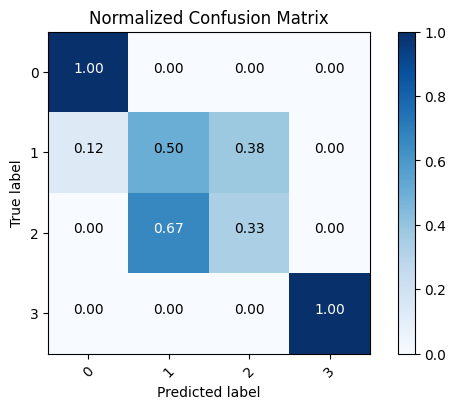

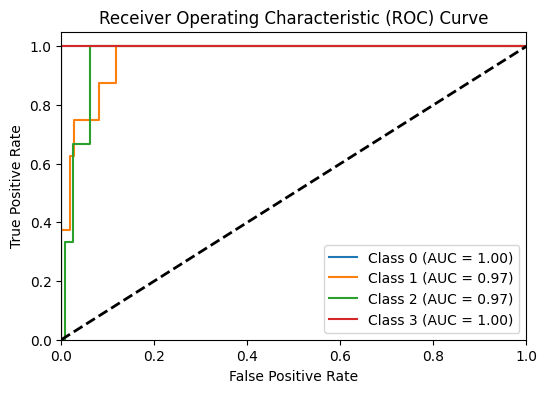

In [39]:
print("\nCNN (Before Preprocessing):")
X_train_resampled, X_test_imputed, y_train_resampled, y_test = preprocess_data(X, y)
num_classes = len(np.unique(y_train_resampled))
input_shape = (X_train_resampled.shape[1], 1)
X_train_reshaped = X_train_resampled.values.reshape(X_train_resampled.shape[0], X_train_resampled.shape[1], 1)
X_test_reshaped = X_test_imputed.values.reshape(X_test_imputed.shape[0], X_test_imputed.shape[1], 1)
model = build_cnn_model(input_shape, num_classes)
cnn_accuracy_before, cnn_precision_before, cnn_recall_before, cnn_f1_before, cnn_roc_auc_before = train_and_evaluate_cnn(model, X_train_reshaped, y_train_resampled, X_test_reshaped, y_test, epochs=20, batch_size=32)

In [40]:
X_train, X_test, y_train, y_test = preprocess_data(X, y)


KNN Classifier (After Preprocessing):
Accuracy: 0.923728813559322
Precision: 0.9337271015237117
Recall: 0.923728813559322
F1 Score: 0.9277966101694916

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       101
           1       0.50      0.50      0.50         8
           2       0.40      0.67      0.50         3
           3       0.83      0.83      0.83         6

    accuracy                           0.92       118
   macro avg       0.68      0.74      0.70       118
weighted avg       0.93      0.92      0.93       118



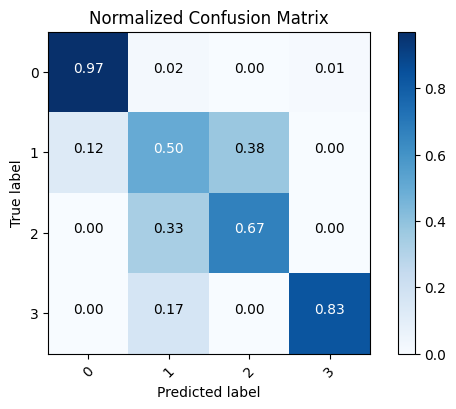

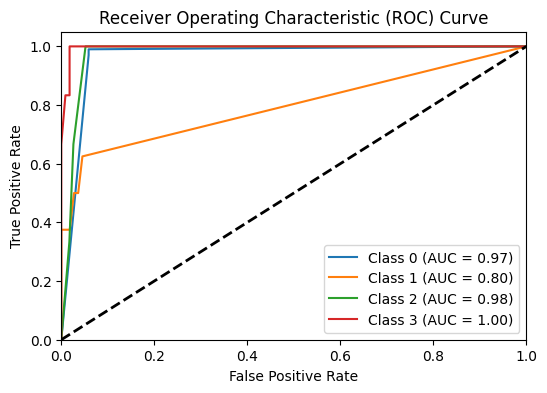

In [41]:
print("\nKNN Classifier (After Preprocessing):")
knn_classifier_after = KNeighborsClassifier(n_neighbors=5)
knn_accuracy_after, knn_precision_after, knn_recall_after, knn_f1_after, _ = train_and_evaluate_ml(
    knn_classifier_after, X_train, X_test, y_train, y_test)